Uji hipotesis digunakan untuk melakukan uji data dalam statistika.
kita mulai dengan dataset boston, data ideal dari regresi library scikit learn, dan dataset pada buku spss

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import pandas as pd
%matplotlib inline

In [2]:
boston = datasets.load_boston()

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [4]:
df['HousePrice'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<b>Membuat Dataset ideal dengan noise tertentu </b>

In [5]:
boston.data.shape[0]

506

In [6]:
boston.data.shape[1]

13

In [7]:

linear_X, linear_y = datasets.make_regression(n_samples=boston.data.shape[0],
                                              n_features=boston.data.shape[1],
                                              noise=70, random_state=46)

# Setting feature names to x1, x2, x3, etc. if they are not defined
linear_feature_names = ['X'+str(feature+1) for feature in range(linear_X.shape[1])]


In [8]:
linear_feature_names

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13']

In [9]:
linear_X

array([[-0.06651158, -2.33153232, -0.14517291, ..., -0.3826548 ,
         0.20602791, -0.11634857],
       [ 0.88407566,  0.33425678, -0.25413968, ...,  0.28529764,
        -0.81290018, -0.13969205],
       [-0.53575011,  1.05143546, -0.74471523, ..., -1.49623532,
         1.34933331, -0.66581387],
       ...,
       [-1.06095235, -1.3404477 , -0.02677359, ...,  1.30931514,
         0.84083631, -0.27091717],
       [-0.38243069,  0.40885312,  1.19802346, ...,  0.16638034,
         0.87008032,  2.24659665],
       [ 0.95971509, -2.31891022,  0.66922142, ..., -0.25740457,
         1.4177079 ,  0.71447474]])

### untuk mencari uji tertentu perlu dilakukan regresi linear

In [10]:
from sklearn.linear_model import LinearRegression

# Fitting the model
boston_model = LinearRegression()
boston_model.fit(boston.data, boston.target)

# Returning the R^2 for the model
boston_r2 = boston_model.score(boston.data, boston.target)
print('R^2: {0}'.format(boston_r2))

R^2: 0.7406426641094094


### fitting model dengan dataset ideal dataset linear

In [11]:
linear_model = LinearRegression()
linear_model.fit(linear_X, linear_y)

# Returning the R^2 for the model
linear_r2 = linear_model.score(linear_X, linear_y)
print('R^2: {0}'.format(linear_r2))

R^2: 0.888404698900449


### hitung residual 

In [12]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

#### Linearitas 
digunakan untuk mencari hubungan linearitas

In [13]:
def linear_assumption(model, features, label):

    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

### kita coba dengan linearitas dataset yang ideal

c:\users\ganteng\appdata\local\programs\python\python37\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


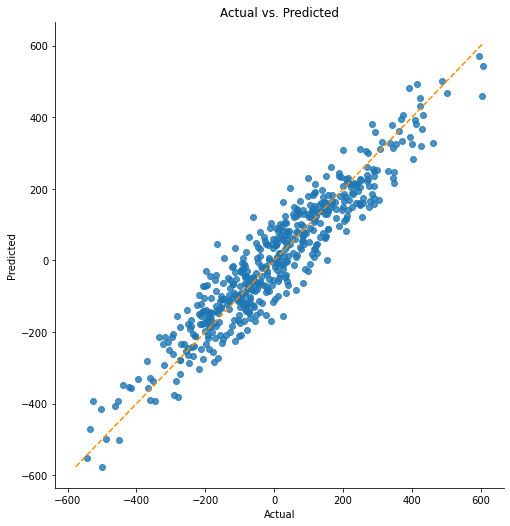

In [14]:
linear_assumption(linear_model, linear_X, linear_y)

### kita coba dengan dataset aseli

c:\users\ganteng\appdata\local\programs\python\python37\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


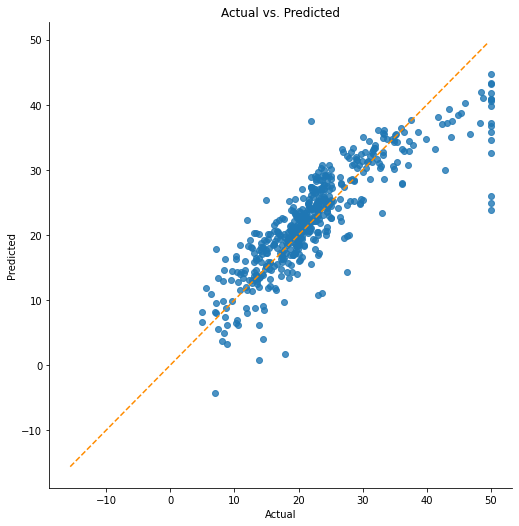

In [15]:
linear_assumption(boston_model, boston.data, boston.target)

### normalitas digunakan untuk mengetahui terdistribusi normal atau tidak

In [16]:
import scipy.stats as stats
from statsmodels.stats.diagnostic import kstest_normal

### fungsi normalitas menggunaan one simple ks test 

In [17]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    df_results = calculate_residuals(model, features, label)
    print(df_results)
    stat,p_value =kstest_normal(df_results['Residuals'])
    print(p_value)

    if (p_value<0.05):
        print("Assumtion is not normal")
    elif(p_value>0.05):
        print("Assumtion is normal")
    
    
    #if p <0.05 distribusi tidak normal 
    

    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    


         Actual   Predicted   Residuals
0    -79.013473 -141.350754  -62.337281
1    -56.617969  -66.746038  -10.128069
2   -252.714203 -137.878277  114.835927
3   -359.346317 -327.047036   32.299281
4   -439.614731 -348.817855   90.796876
..          ...         ...         ...
501  -72.488109 -118.130109  -45.642000
502   34.939929   -4.413250   30.526679
503   37.098226   58.964161  -21.865935
504   36.286999   83.616339  -47.329340
505  209.086405  115.352800   93.733605

[506 rows x 3 columns]
0.6592038054784376
Assumtion is normal


c:\users\ganteng\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


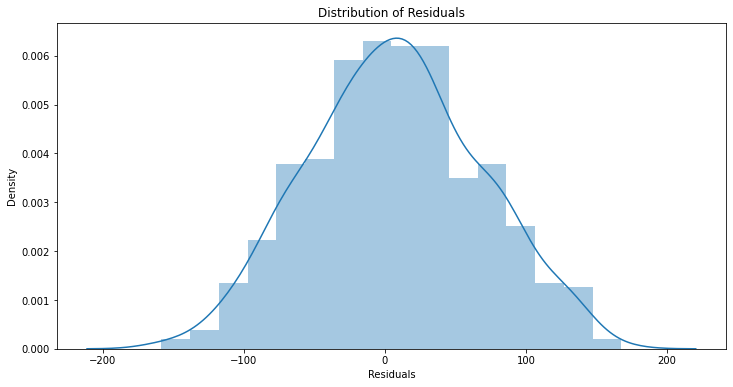

In [18]:
normal_errors_assumption(linear_model, linear_X, linear_y)

### dataset boston

     Actual  Predicted  Residuals
0      24.0  30.003843  -6.003843
1      21.6  25.025562  -3.425562
2      34.7  30.567597   4.132403
3      33.4  28.607036   4.792964
4      36.2  27.943524   8.256476
..      ...        ...        ...
501    22.4  23.533341  -1.133341
502    20.6  22.375719  -1.775719
503    23.9  27.627426  -3.727426
504    22.0  26.127967  -4.127967
505    11.9  22.344212 -10.444212

[506 rows x 3 columns]
0.0009999999999998899
Assumtion is not normal


c:\users\ganteng\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


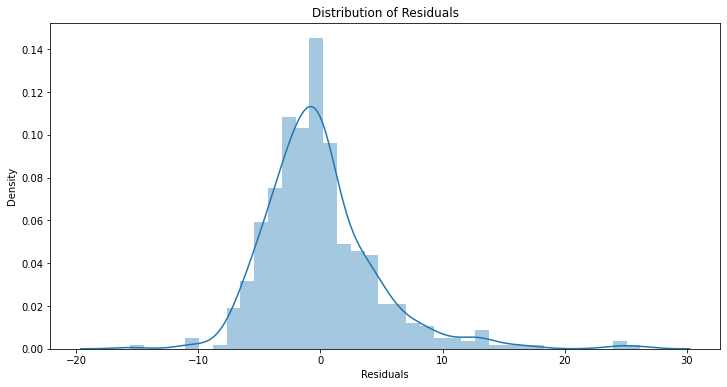

In [19]:
normal_errors_assumption(boston_model, boston.data, boston.target)

### coba dataset yang ada dibuku spss

In [20]:
df=pd.read_csv("C:/Users/ganteng/Documents/spss/dataset_uji.csv")
df

,tingkat_penjualan,biaya_produksi,biaya_distribusi,biaya_promosi
0,127300000,37800000,11700000,8700000
1,122500000,38100000,10900000,8300000
2,146800000,42900000,11200000,9000000
3,159200000,45200000,14800000,9600000
4,171800000,48400000,12300000,9800000
5,176600000,49200000,16800000,9200000
6,193500000,48700000,19400000,12000000
7,189300000,48300000,20500000,12700000
8,224500000,50300000,19400000,14000000
9,239100000,55800000,20200000,17300000


In [21]:
X_train = df.drop(columns="tingkat_penjualan")
y_train = df.tingkat_penjualan

In [22]:
dataset_model = LinearRegression()
dataset_model.fit(X_train, y_train)

# Returning the R^2 for the model
dataset_r2 = dataset_model.score(X_train, y_train)
print('R^2: {0}'.format(dataset_r2 ))

R^2: 0.983483897810755


In [23]:
# linear_assumption(dataset_model, X_train, y_train)

       Actual     Predicted     Residuals
0   127300000  1.266387e+08  6.613414e+05
1   122500000  1.239566e+08 -1.456551e+06
2   146800000  1.445755e+08  2.224540e+06
3   159200000  1.585194e+08  6.805710e+05
4   171800000  1.686171e+08  3.182890e+06
5   176600000  1.689401e+08  7.659945e+06
6   193500000  1.909740e+08  2.525996e+06
7   189300000  1.958848e+08 -6.584807e+06
8   224500000  2.117352e+08  1.276476e+07
9   239100000  2.553395e+08 -1.623951e+07
10  257300000  2.693741e+08 -1.207415e+07
11  269200000  2.897182e+08 -2.051820e+07
12  308200000  3.036385e+08  4.561485e+06
13  358800000  3.476403e+08  1.115975e+07
14  362500000  3.510481e+08  1.145193e+07
0.1446816128879218
Assumtion is normal


c:\users\ganteng\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


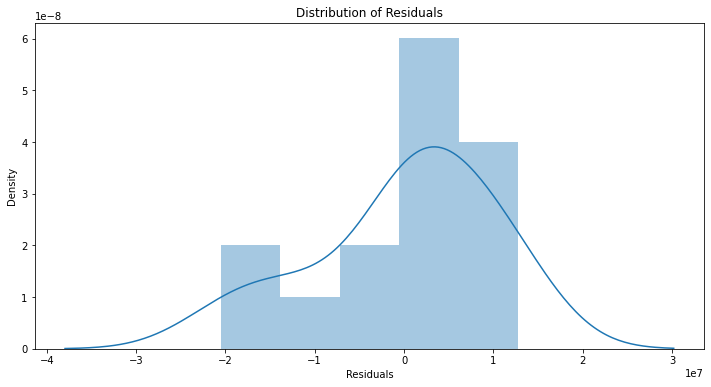

In [24]:
normal_errors_assumption(dataset_model, X_train, y_train)

### Multicolearitas

ini menimbulkan koefisien yang saling berkorelasi langsung
sehingga, perlu dilakukan reduction dimensi. dari 3 variable dibuat 2 variable misalnya

In [25]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print(features.shape[1])
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        
    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

### dataset ideal

In [26]:
kolom=df.columns.tolist()
print(kolom)

['tingkat_penjualan', 'biaya_produksi', 'biaya_distribusi', 'biaya_promosi']


Assumption 3: Little to no multicollinearity among predictors


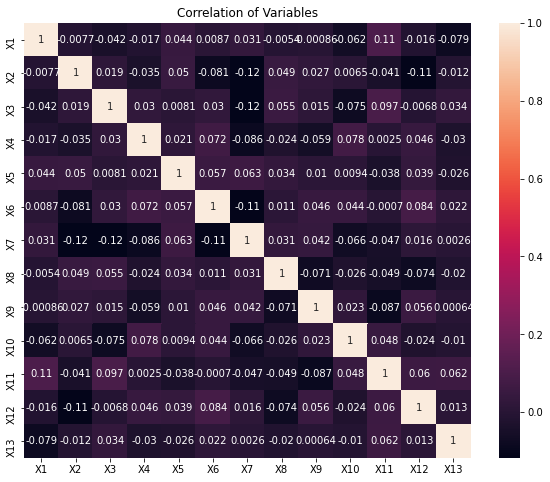

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
13
X1: 1.0309311702971027
X2: 1.045717680299211
X3: 1.0418076962011933
X4: 1.0269600632251445
X5: 1.0199882018822788
X6: 1.0404194675991594
X7: 1.0670847781889183
X8: 1.0229686036798158
X9: 1.0292923730360835
X10: 1.0289003332516535
X11: 1.0520432208216244
X12: 1.0336719449364802
X13: 1.0140788728975827

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied


In [27]:
multicollinearity_assumption(linear_model, linear_X, linear_y, linear_feature_names)

In [28]:
linear_feature_names

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13']

### dataset boston

Assumption 3: Little to no multicollinearity among predictors


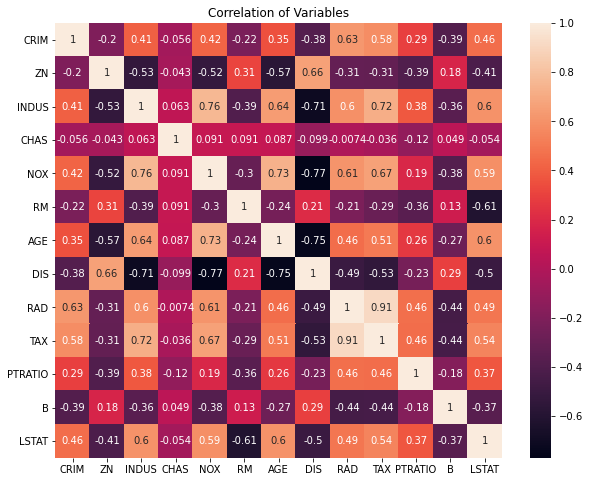

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
13
CRIM: 2.1003728199615224
ZN: 2.8440132669462637
INDUS: 14.485757706539331
CHAS: 1.1529518589418777
NOX: 73.89494652814788
RM: 77.94828304638538
AGE: 21.38685048994314
DIS: 14.699652383749175
RAD: 15.167724857920897
TAX: 61.227274009649456
PTRATIO: 85.02954731061801
B: 20.104942636229136
LSTAT: 11.102024772203539

10 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied

Coefficient interpretability may be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


In [29]:
multicollinearity_assumption(boston_model, boston.data, boston.target, boston.feature_names)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(boston.data, i) for i in range(boston.data.shape[1])]
print(VIF)
for idx, vif in enumerate(VIF):
    print('{0}: {1}'.format(boston.feature_names[idx], vif))

[2.1003728199615224, 2.8440132669462637, 14.485757706539331, 1.1529518589418777, 73.89494652814788, 77.94828304638538, 21.38685048994314, 14.699652383749175, 15.167724857920897, 61.227274009649456, 85.02954731061801, 20.104942636229136, 11.102024772203539]
CRIM: 2.1003728199615224
ZN: 2.8440132669462637
INDUS: 14.485757706539331
CHAS: 1.1529518589418777
NOX: 73.89494652814788
RM: 77.94828304638538
AGE: 21.38685048994314
DIS: 14.699652383749175
RAD: 15.167724857920897
TAX: 61.227274009649456
PTRATIO: 85.02954731061801
B: 20.104942636229136
LSTAT: 11.102024772203539


### dataset buku spss

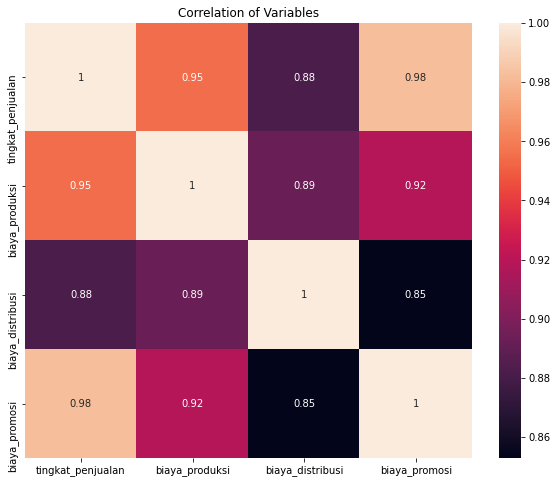

In [31]:
plt.figure(figsize = (10,8))
sns.heatmap(pd.DataFrame(df, columns=kolom).corr(), annot=True)
plt.title('Correlation of Variables')
plt.show()

In [32]:
df.shape[1]

4

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(df.values, i) for i in range(df.values.shape[1])]
print(VIF)
for idx, vif in enumerate(VIF):
    print('{0}: {1}'.format(kolom[idx], vif))

[442.8097500214343, 80.06217008837211, 81.90196529144355, 217.01645171825598]
tingkat_penjualan: 442.8097500214343
biaya_produksi: 80.06217008837211
biaya_distribusi: 81.90196529144355
biaya_promosi: 217.01645171825598


In [34]:
possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
print()
print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
print()

if definite_multicollinearity == 0:
    if possible_multicollinearity == 0:
        print('Assumption satisfied')
    else:
        print('Assumption possibly satisfied')
        print()
        print('Coefficient interpretability may be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

else:
    print('Assumption not satisfied')
    print()
    print('Coefficient interpretability will be problematic')
    print('Consider removing variables with a high Variance Inflation Factor (VIF)')


4 cases of possible multicollinearity
2 cases of definite multicollinearity

Assumption not satisfied

Coefficient interpretability will be problematic
Consider removing variables with a high Variance Inflation Factor (VIF)


## autokorelasi <br>

digunakan atau data itu dipengaruhi oleh waktu atau tidak. misal data ke 2 dipengaruhi oleh data kedua atau tidak
soalnya kalo linear tidak cocok dengan time series

In [35]:
def autocorrelation_assumption(model, features, label):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

### testing with ideal dataset 

In [36]:
autocorrelation_assumption(linear_model, linear_X, linear_y)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.0079993085655583
Little to no autocorrelation 

Assumption satisfied


### testing boston

In [37]:
autocorrelation_assumption(boston_model, boston.data, boston.target)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.0715916506006853
Signs of positive autocorrelation 

Assumption not satisfied


#### testing dengan data spss

In [38]:
autocorrelation_assumption(dataset_model, X_train, y_train)

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.5274473127938977
Little to no autocorrelation 

Assumption satisfied


## heteroskedasiti
<br>
Uji homoskedastisitas digunakan dalam menguji error atau galat dalam model statistik untuk melihat apakah varians atau keragaman dari error terpengaruh oleh faktor lain atau tidak

In [39]:
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()  

### dataset ideal

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


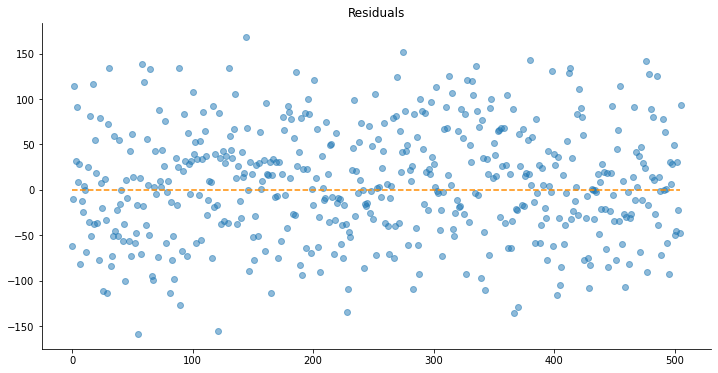

In [40]:
homoscedasticity_assumption(linear_model, linear_X, linear_y)

### boston dataset

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


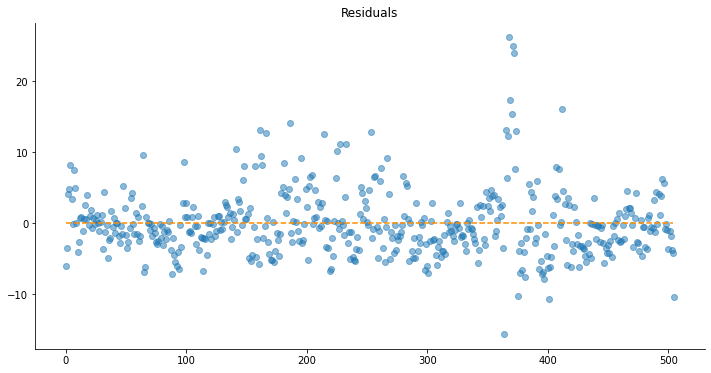

In [41]:
homoscedasticity_assumption(boston_model, boston.data, boston.target)

### dataset buku spss

Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


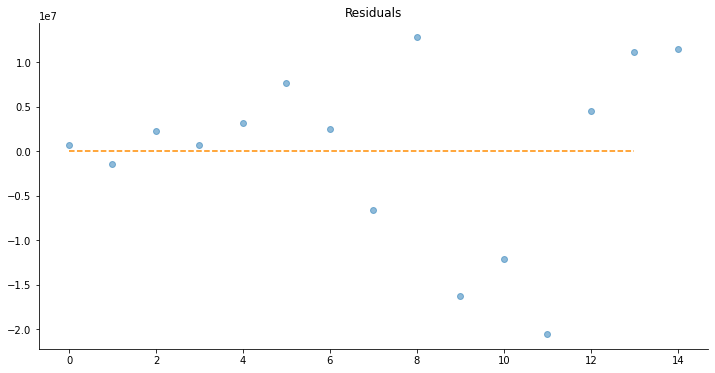

In [42]:
homoscedasticity_assumption(dataset_model, X_train, y_train)

### OLS analysis dataset ideal

In [52]:
import statsmodels.api as sm 
linearx = sm.add_constant(linear_X) 
lineary=linear_y

In [53]:
result1 = sm.OLS(lineary, linearx).fit() 

In [54]:
print(result1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     301.3
Date:                Fri, 13 Nov 2020   Prob (F-statistic):          1.45e-224
Time:                        00:26:16   Log-Likelihood:                -2841.4
No. Observations:                 506   AIC:                             5711.
Df Residuals:                     492   BIC:                             5770.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4759      3.033      0.816      0.4

### OLS Analysis boston 

In [44]:
import statsmodels.api as sm 
boston_X = sm.add_constant(boston.data) 

In [45]:
boston_y=boston.target

In [46]:
result = sm.OLS(boston_y, boston_X).fit() 

In [47]:
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 13 Nov 2020   Prob (F-statistic):          6.72e-135
Time:                        00:19:46   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

### OLS Analysis dataset spss

In [48]:
X_train = sm.add_constant(X_train) 

In [49]:
y_train=y_train

In [50]:
result = sm.OLS(y_train, X_train).fit() 

In [51]:
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:      tingkat_penjualan   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     218.3
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           4.43e-10
Time:                        00:21:29   Log-Likelihood:                -262.52
No. Observations:                  15   AIC:                             533.0
Df Residuals:                      11   BIC:                             535.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.623e+07   3.56e+07  

c:\users\ganteng\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


Notes:<br>
#### <b> P>|t| dikenal kalo di spss bisa dibilang signifikasi </b>
#### uji T, hubungan parsial antar dua variable. uji f variable independent terdapat dependent 